# WOA temperature, surface from 1995 - 2005 
## monthly data 
 |dataset   | month   |
 |----------|-----------|
 |t01_01.nc | January   |
 |t02_01.nc | February  |
 |t03_01.nc | March  |
 |t04_01.nc | April  |
 |t05_01.nc | May  |
 |t06_01.nc | June  |
 |t07_01.nc | July  |
 |t08_01.nc | August  |
 |t09_01.nc | September  |
 |t10_01.nc | October  |
 |t11_01.nc | November  |
 |t12_01.nc | December  |
 
 
The links to the data:  
* https://www.nodc.noaa.gov/cgi-bin/OC5/woa18/woa18.pl
* https://www.nodc.noaa.gov/cgi-bin/OC5/woa18/woa18oxnu.pl
* https://www.nodc.noaa.gov/cgi-bin/OC5/woa18/woa18oxnu.pl

In [1]:
%matplotlib inline
import warnings
warnings.simplefilter("ignore") # Silence warnings
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import hvplot.xarray
import xarray as xr
import cartopy
import cartopy.crs as ccrs
import numpy as np
from matplotlib.pyplot import figure
import pylab 
from cartopy.util import add_cyclic_point
import operator

# Scientific libraries
from numpy import arange,array,ones
from scipy import stats

import scipy.io as sio
import pandas as pd
import matplotlib.cm as cm

In [2]:
ds1 = xr.open_dataset('data/woa18_95A4_t01_01.nc',decode_times=False)
ds2 = xr.open_dataset('data/woa18_95A4_t02_01.nc',decode_times=False)
ds3 = xr.open_dataset('data/woa18_95A4_t03_01.nc',decode_times=False)
ds4 = xr.open_dataset('data/woa18_95A4_t04_01.nc',decode_times=False)
ds5 = xr.open_dataset('data/woa18_95A4_t05_01.nc',decode_times=False)
ds6 = xr.open_dataset('data/woa18_95A4_t06_01.nc',decode_times=False)
ds7 = xr.open_dataset('data/woa18_95A4_t07_01.nc',decode_times=False)
ds8 = xr.open_dataset('data/woa18_95A4_t08_01.nc',decode_times=False)
ds9 = xr.open_dataset('data/woa18_95A4_t09_01.nc',decode_times=False)
ds10 = xr.open_dataset('data/woa18_95A4_t10_01.nc',decode_times=False)
ds11 = xr.open_dataset('data/woa18_95A4_t11_01.nc',decode_times=False)
ds12 = xr.open_dataset('data/woa18_95A4_t12_01.nc',decode_times=False)

In [3]:
temp_obs = np.concatenate([ds1.t_an,ds2.t_an,ds3.t_an,ds4.t_an,
                            ds5.t_an,ds6.t_an,ds7.t_an,ds8.t_an,
                            ds9.t_an,ds10.t_an,ds11.t_an,ds12.t_an], axis = 0)
temp_surf_obs = (temp_obs[:,0,:,:]+temp_obs[:,1,:,:])/2
temp_surf_avg_obs = np.nanmean(temp_surf_obs, axis=0)

Text(0.5, 1.0, '$^oC$')

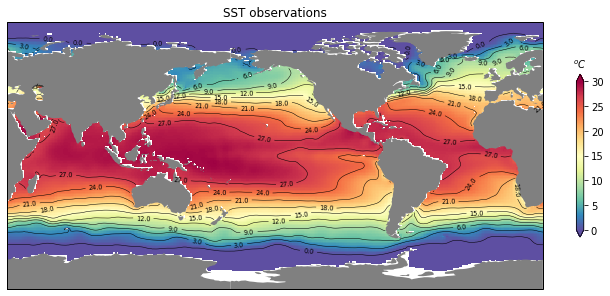

In [4]:
fig = plt.figure(figsize=(12, 6))
lat = ds1.lat

# minimum 
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=210.0))
phyto, lon = add_cyclic_point(temp_surf_avg_obs, coord=ds1.lon, axis=1)
cf = ax.pcolor(lon, lat, phyto, cmap='Spectral_r',transform=ccrs.PlateCarree(), vmax = 30, vmin =0)

cs = ax.contour(lon, lat, phyto, colors='k', levels=10, linewidths=0.5, transform=ccrs.PlateCarree())
lb = plt.clabel(cs, fontsize=6.5, inline=True, fmt='%r',inline_spacing=5);
land = ax.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax.set_title('SST observations')
cbar = plt.colorbar(cf, shrink=0.5, extend = 'both')
cbar.ax.set_title('$^oC$', fontsize = 10)

# WOA nitrate, from 1958

In [5]:
ds1_n = xr.open_dataset('data/woa18_all_n01_01.nc',decode_times=False)
ds2_n = xr.open_dataset('data/woa18_all_n02_01.nc',decode_times=False)
ds3_n = xr.open_dataset('data/woa18_all_n03_01.nc',decode_times=False)
ds4_n = xr.open_dataset('data/woa18_all_n04_01.nc',decode_times=False)
ds5_n = xr.open_dataset('data/woa18_all_n05_01.nc',decode_times=False)
ds6_n = xr.open_dataset('data/woa18_all_n06_01.nc',decode_times=False)
ds7_n = xr.open_dataset('data/woa18_all_n07_01.nc',decode_times=False)
ds8_n = xr.open_dataset('data/woa18_all_n08_01.nc',decode_times=False)
ds9_n = xr.open_dataset('data/woa18_all_n09_01.nc',decode_times=False)
ds10_n = xr.open_dataset('data/woa18_all_n10_01.nc',decode_times=False)
ds11_n = xr.open_dataset('data/woa18_all_n11_01.nc',decode_times=False)
ds12_n = xr.open_dataset('data/woa18_all_n12_01.nc',decode_times=False)

In [6]:
no3_obs = np.concatenate([ds1_n.n_an,ds2_n.n_an,ds3_n.n_an,ds4_n.n_an,
                            ds5_n.n_an,ds6_n.n_an,ds7_n.n_an,ds8_n.n_an,
                            ds9_n.n_an,ds10_n.n_an,ds11_n.n_an,ds12_n.n_an], axis = 0)
no3_surf_obs = (no3_obs[:,0,:,:]+no3_obs[:,1,:,:])/2
no3_surf_avg_obs = np.nanmean(no3_surf_obs, axis=0)

Text(0.5, 1.0, '$\\mu mol/kg$')

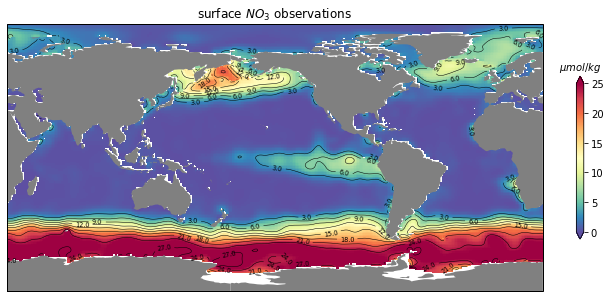

In [7]:
fig = plt.figure(figsize=(12, 6))
lat = ds1.lat

# minimum 
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=210.0))
phyto, lon = add_cyclic_point(no3_surf_avg_obs, coord=ds1.lon, axis=1)
cf = ax.pcolor(lon, lat, phyto, cmap='Spectral_r',transform=ccrs.PlateCarree(), vmin=0, vmax=25)

cs = ax.contour(lon, lat, phyto, colors='k', levels=10, linewidths=0.5, transform=ccrs.PlateCarree())
lb = plt.clabel(cs, fontsize=6.5, inline=True, fmt='%r',inline_spacing=5);
land = ax.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax.set_title('surface $NO_3$ observations ')
cbar = plt.colorbar(cf, shrink=0.5, extend = 'both')
cbar.ax.set_title('$\mu mol/kg$', fontsize = 10)

# WOA phosphate, from 1958

In [8]:
ds1_p = xr.open_dataset('data/woa18_all_p01_01.nc',decode_times=False)
ds2_p = xr.open_dataset('data/woa18_all_p02_01.nc',decode_times=False)
ds3_p = xr.open_dataset('data/woa18_all_p03_01.nc',decode_times=False)
ds4_p = xr.open_dataset('data/woa18_all_p04_01.nc',decode_times=False)
ds5_p = xr.open_dataset('data/woa18_all_p05_01.nc',decode_times=False)
ds6_p = xr.open_dataset('data/woa18_all_p06_01.nc',decode_times=False)
ds7_p = xr.open_dataset('data/woa18_all_p07_01.nc',decode_times=False)
ds8_p = xr.open_dataset('data/woa18_all_p08_01.nc',decode_times=False)
ds9_p = xr.open_dataset('data/woa18_all_p09_01.nc',decode_times=False)
ds10_p = xr.open_dataset('data/woa18_all_p10_01.nc',decode_times=False)
ds11_p = xr.open_dataset('data/woa18_all_p11_01.nc',decode_times=False)
ds12_p = xr.open_dataset('data/woa18_all_p12_01.nc',decode_times=False)

In [9]:
po4_obs = np.concatenate([ds1_p.p_an,ds2_p.p_an,ds3_p.p_an,ds4_p.p_an,
                            ds5_p.p_an,ds6_p.p_an,ds7_p.p_an,ds8_p.p_an,
                            ds9_p.p_an,ds10_p.p_an,ds11_p.p_an,ds12_p.p_an], axis = 0)
po4_surf_obs = (po4_obs[:,0,:,:]+po4_obs[:,1,:,:])/2
po4_surf_avg_obs = np.nanmean(po4_surf_obs, axis =0)

Text(0.5, 1.0, '$\\mu mol/kg$')

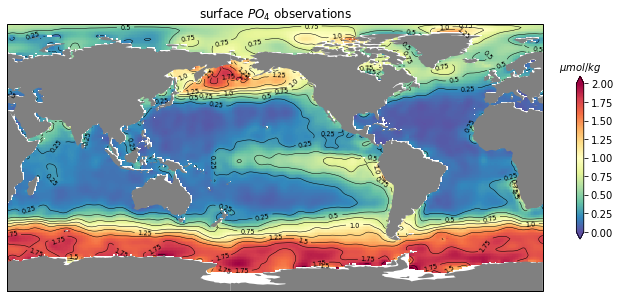

In [10]:
fig = plt.figure(figsize=(12, 6))
lat = ds1.lat

# minimum 
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=210.0))
phyto, lon = add_cyclic_point(po4_surf_avg_obs, coord=ds1.lon, axis=1)
cf = ax.pcolor(lon, lat, phyto, cmap='Spectral_r',transform=ccrs.PlateCarree(),vmin =0, vmax = 2)

cs = ax.contour(lon, lat, phyto, colors='k', levels=10, linewidths=0.5, transform=ccrs.PlateCarree())
lb = plt.clabel(cs, fontsize=6.5, inline=True, fmt='%r',inline_spacing=5);
land = ax.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax.set_title('surface $PO_4$ observations')
cbar = plt.colorbar(cf, shrink=0.5, extend='both')
cbar.ax.set_title('$\mu mol/kg$', fontsize = 10)
#fig.savefig('po4_surf_woa_annual.png', dpi=300, bbox_inches='tight')

In [11]:
sio.savemat('WOA_SST&Nutrients.mat',{'temp_surf_obs':temp_surf_obs,
                          'temp_surf_avg_obs':temp_surf_avg_obs,
                          'temp_obs':temp_obs,
                          'no3_surf_obs':no3_surf_obs,
                          'no3_surf_avg_obs':no3_surf_avg_obs,
                          'no3_obs':no3_obs,
                          'po4_obs':po4_obs,
                          'po4_surf_obs':po4_surf_obs,
                          'po4_surf_avg_obs':po4_surf_avg_obs,
                          'lon':ds1.lon,
                          'lat':ds1.lat})